In [20]:
require(ggplot2, warn.conflicts = FALSE);
require(tidyverse, warn.conflicts = FALSE);
require(cowplot, warn.conflicts = FALSE);
library(lubridate)

## Plots to create:
- plot: compare regimes - directly contrast in same plot!
it has to be plausible:
- plot: compare PFT to HPLC data
- modify grazing?
- constant mixing increases with X25.8 depth

In [39]:
outarray_full <- read.csv("outarray_full.csv")

In [40]:
head(outarray_full)

outarray_full$date <- as.Date(outarray_full$date)

X,date,time,N,Si,P1,P2,Z,D,PTempDepGrow,...,SiMixing,ZLosses,ZUnassimFeedDetritus,DGains,DRemin,DZooGrazed,DSinking,DLosses,NMixing,ZUnassimFeedNitrate
0,1993-01-15,0,2.000000,2.000000,0.1000000,0.1000000,0.10000000,0.1000000,0.000000,...,0.000000000,0.0000000000,0.00000000,0.000000000,0.000000e+00,0.000000000,0.000000000,0.0000000,0.0000000000,0.000000000
1,1993-01-16,1,2.045163,2.031145,0.1023576,0.1000973,0.09825964,0.1190079,1.818703,...,0.003973843,0.0002770301,0.04238817,0.002095176,9.695264e-05,0.002095176,0.004287305,0.1387480,0.0001541538,0.004011989
2,1993-01-17,2,2.088323,2.060728,0.1049641,0.1002830,0.09658024,0.1378703,2.727113,...,0.005896981,0.0004230416,0.06389066,0.003379674,1.681392e-04,0.003379674,0.006927487,0.2061546,0.0002354022,0.006050222
3,1993-01-18,3,2.129489,2.088752,0.1078188,0.1005488,0.09496130,0.1566222,3.634783,...,0.007771769,0.0005763002,0.08567961,0.004852214,2.600448e-04,0.004852214,0.009964472,0.2720321,0.0003206832,0.008118026
4,1993-01-19,4,2.168671,2.115216,0.1109215,0.1008868,0.09340227,0.1752977,4.541725,...,0.009600484,0.0007378546,0.10778909,0.006511863,3.747822e-04,0.006511863,0.013398508,0.3364185,0.0004105804,0.010218641
5,1993-01-20,5,2.205877,2.140117,0.1142723,0.1012898,0.09190265,0.1939290,5.447950,...,0.011385335,0.0009087176,0.13025236,0.008358020,5.143687e-04,0.008358020,0.017230409,0.3993509,0.0005056574,0.012355235


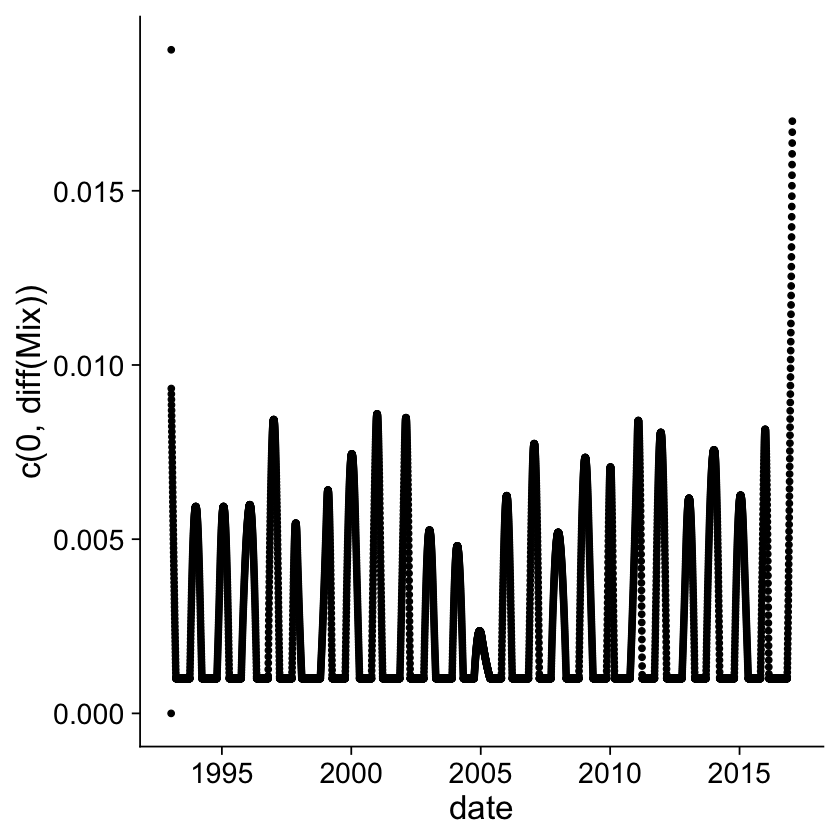

In [49]:
ggplot(data=outarray_full) + geom_point(aes(x=date, y=c(0,diff(Mix)))) + theme_cowplot(20)

In [68]:
tail(modelout_reg1$date, n=1)

[1] "2000-10-30"

In [83]:
outarray_full_reg1 = outarray_full[outarray_full$date > head(modelout_reg1$date, n=1) & outarray_full$date < tail(modelout_reg1$date, n=1),]

outarray_full_reg2 = outarray_full[outarray_full$date > head(modelout_reg2$date, n=1) & outarray_full$date < tail(modelout_reg2$date, n=1),]

In [108]:
#library(lubridate)
#yday(outarray_full_reg1$date)

In [94]:
# outarray_full_reg2 <- outarray_full_reg2[0:1763,]
nrow(outarray_full_reg1)
nrow(outarray_full_reg2)

[1] 1763

[1] 1763

In [100]:
mean(diff(outarray_full_reg1$Mix),na.rm=T)
sd(diff(outarray_full_reg1$Mix),na.rm=T)
mean(diff(outarray_full_reg2$Mix),na.rm=T)
sd(diff(outarray_full_reg2$Mix),na.rm=T)

[1] 0.002672727

[1] 0.002273035

[1] 0.002553551

[1] 0.002165841

Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

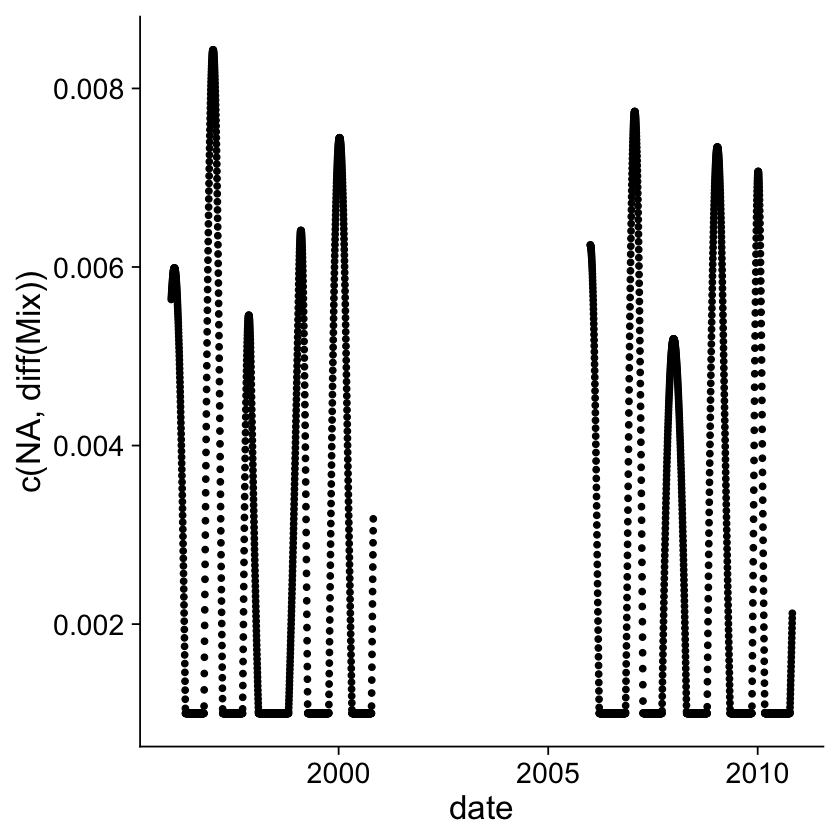

In [96]:
ggplot(data=outarray_full_reg1) + geom_point(aes(x=date, y=c(NA,diff(Mix)))) +
geom_point(data=outarray_full_reg2, aes(x=date, y=c(NA,diff(Mix)))) + theme_cowplot(20)

In [52]:
modelout_reg1 <- read.csv("modelout_reg1.csv")
modelout_reg2 <- read.csv("modelout_reg2.csv")

In [53]:
head(modelout_reg1)

modelout_reg1$date <- as.Date(modelout_reg1$date)

modelout_reg2$date <- as.Date(modelout_reg2$date)

X,N,Si,PFT_all,PFT_1,PFT_2,Zall,Det,time,date
0,2.599211,2.510769,0.2874066,0.06721602,0.2201906,0.1242198,1.011348,1082,1996-01-01
1,2.611095,2.523860,0.2912537,0.07026864,0.2209851,0.1249784,1.017977,1083,1996-01-02
2,2.622589,2.536478,0.2952062,0.07346275,0.2217435,0.1257760,1.024808,1084,1996-01-03
3,2.633681,2.548602,0.2992658,0.07680276,0.2224630,0.1266143,1.031843,1085,1996-01-04
4,2.644358,2.560210,0.3034338,0.08029289,0.2231409,0.1274948,1.039087,1086,1996-01-05
5,2.654607,2.571281,0.3077113,0.08393719,0.2237741,0.1284195,1.046542,1087,1996-01-06


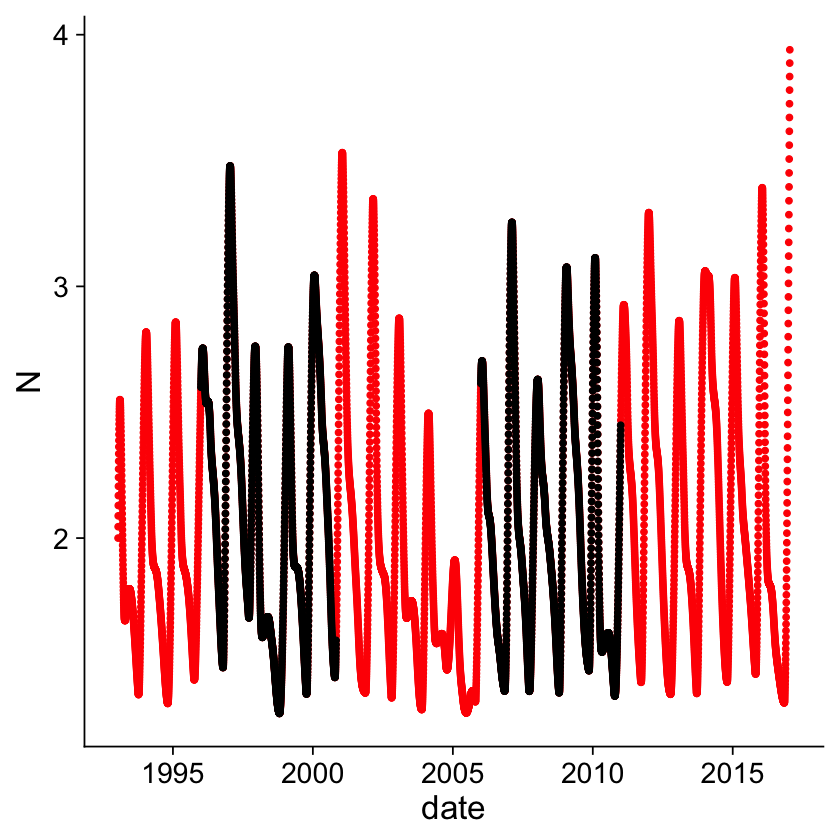

In [44]:
ggplot() + 
geom_point(data=outarray_full, aes(x=date,y=N), col='red') +geom_point(data=modelout_reg1, aes(x=date, y=N)) + 
geom_point(data=modelout_reg2, aes(x=date, y=N)) + theme_cowplot(20) 

In [45]:
forcing_reg1 <- read.csv("forcing_reg1.csv")
forcing_reg2 <- read.csv("forcing_reg2.csv")

In [46]:
head(forcing_reg1)

forcing_reg1$date <- as.Date(forcing_reg1$date)
forcing_reg2$date <- as.Date(forcing_reg2$date)

X,NOX,SiOX,x258,PAR,Tmld,time,yday,date
0,9.295853,6.738255,84.26701,47.65527,23.07460,1082,1,1996-01-01
1,9.295853,6.738255,83.80338,47.72250,23.04187,1083,2,1996-01-02
2,9.295853,6.738255,83.33753,47.79096,23.00970,1084,3,1996-01-03
3,9.295853,6.738255,82.86952,47.86059,22.97812,1085,4,1996-01-04
4,9.295853,6.738255,82.39941,47.93133,22.94710,1086,5,1996-01-05
5,9.295853,6.738255,81.92726,48.00310,22.91666,1087,6,1996-01-06


In [125]:
# READ VERIFICATION

BoxVSatDepth <- read.csv("../Data/NewestData/BoxVSatDepth_02.csv")
CHLA_df <- read.csv("../Data/NewestData/HPLCPinckneyTotAndSpec_03.csv")
ZOO_df <- read.csv("../Data/NewestData/ZooplanktonData_05.csv")

In [126]:
BoxVSatDepth$date <- as.Date(BoxVSatDepth$date)
CHLA_df$date <- as.Date(CHLA_df$date)
ZOO_df$date <- as.Date(ZOO_df$date)

In [133]:
BoxVSatDepth_reg1 = BoxVSatDepth[BoxVSatDepth$date > head(modelout_reg1$date, n=1) & BoxVSatDepth$date < tail(modelout_reg1$date, n=1),]
BoxVSatDepth_reg2 = BoxVSatDepth[BoxVSatDepth$date > head(modelout_reg2$date, n=1) & BoxVSatDepth$date < tail(modelout_reg2$date, n=1),]

In [130]:
CHLA_df_reg1 = CHLA_df[CHLA_df$date > head(modelout_reg1$date, n=1) & CHLA_df$date < tail(modelout_reg1$date, n=1),]
CHLA_df_reg2 = CHLA_df[CHLA_df$date > head(modelout_reg2$date, n=1) & CHLA_df$date < tail(modelout_reg2$date, n=1),]

In [131]:
ZOO_df_reg1 = ZOO_df[ZOO_df$date > head(modelout_reg1$date, n=1) & ZOO_df$date < tail(modelout_reg1$date, n=1),]
ZOO_df_reg2 = ZOO_df[ZOO_df$date > head(modelout_reg2$date, n=1) & ZOO_df$date < tail(modelout_reg2$date, n=1),]

In [134]:
#BoxVSatDepth_reg2 <- BoxVSatDepth_reg2[0:1763,]
#CHLA_df_reg2 <- CHLA_df_reg2[0:1763,]
#ZOO_df_reg2 <- ZOO_df_reg2[0:1763,]
BoxVSatDepth_reg1$NO3_NO2_USF_Box

# Start plotting final plots here:

### First Plot:
- plot: compare regimes - directly contrast in same plot!

Warning message:
“Removed 23 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 1707 rows containing non-finite values (stat_boxplot).”

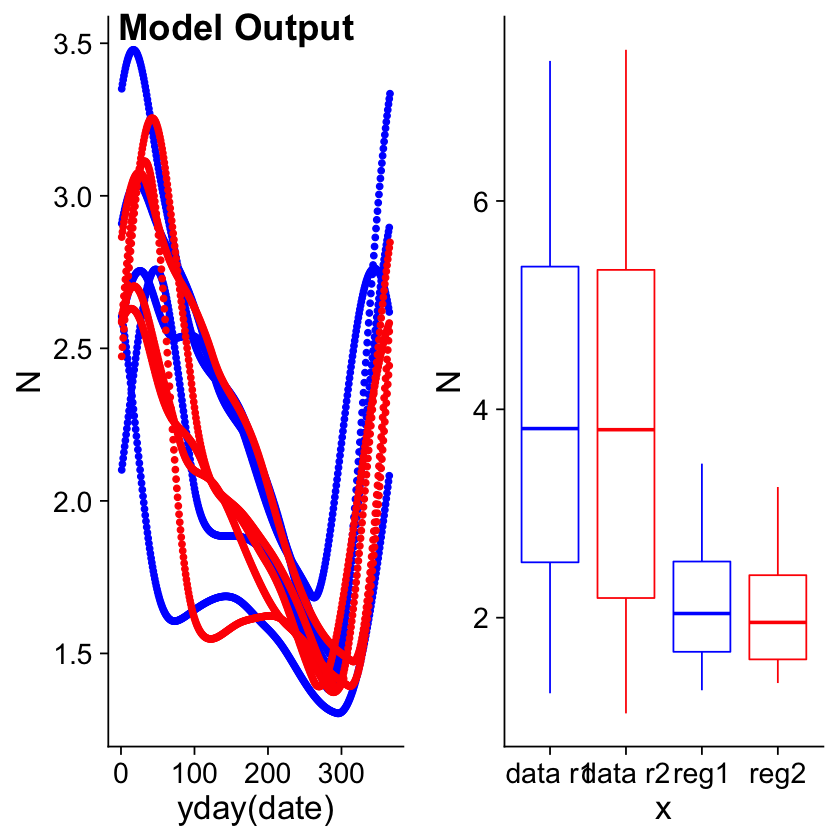

In [135]:
p1 <- ggplot() + 
  geom_point(data=outarray_full_reg1, aes(yday(date), N), col='blue') +
  geom_point(data=outarray_full_reg2, aes(yday(date), N), col='red') +
  theme_cowplot(20)
p2 <- ggplot() +
  geom_boxplot(data=outarray_full_reg1, aes('reg1', N), col='blue') +
  geom_boxplot(data=outarray_full_reg2, aes('reg2', N), col='red') +
  geom_boxplot(data=BoxVSatDepth_reg1, aes('data r1', NO3_NO2_USF_Box), col='blue') +
  geom_boxplot(data=BoxVSatDepth_reg2, aes('data r2', NO3_NO2_USF_Box), col='red') +
  theme_cowplot(20)

plot_grid(p1, p2, labels = c('Model Output', ''), label_size = 22, ncol=2) 